In [ ]:
import pandas as pd
import numpy as np

import os

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/project'

/content/drive/MyDrive/project


In [ ]:
from numpy import array
from keras_preprocessing.sequence import pad_sequences
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.models import Model
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.models import load_model
from keras.layers import Bidirectional

from nltk.tokenize import word_tokenize
import re
import tensorflow as tf
from matplotlib import pyplot as plt



from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

from numpy import array
from numpy import asarray
from numpy import zeros

In [ ]:
import pickle

with open('df_train.pkl', 'rb') as f:
    df_train = pickle.load(f)

with open('df_validation.pkl', 'rb') as f:
    df_validation = pickle.load(f)

In [ ]:
from sklearn.utils import shuffle

def xy_data(data):
  
  data.body = data.body + data.clean_title
  data.drop(columns=["clean_title"], axis = 1, inplace=True)


  data = shuffle(data)

  data.reset_index(inplace=True, drop=True)

  x_train_features = data['body']
  
  y_train = data['2_way_label']
  
  display(x_train_features.head())
  display(y_train.head())

  return x_train_features, y_train

In [ ]:
X_train, Y_train = xy_data(df_train)

0    Shocking Memeraichu electrical panel local lib...
1    Weeee What happened New Jersey This repost got...
2    Stupid sexy Trotsky Paint like one Russian rev...
3    I dont get Im idiot help Ayy I live near Lmao ...
4    These starting get ridiculous But isnt youd ex...
Name: body, dtype: object

0    1
1    0
2    0
3    1
4    0
Name: 2_way_label, dtype: int64

In [ ]:
X_validation, Y_validation = xy_data(df_validation)

0    someone gonna seemed like logical choice In mi...
1    Hey man thats almost bananas gotta careful Ive...
2    Good poemlord cardigan leads charge light brigade
3    OK I give I cant work car Im sure I like bette...
4    Darth Marlboro deleted Kind obvious userKkhaza...
Name: body, dtype: object

0    1
1    1
2    0
3    0
4    1
Name: 2_way_label, dtype: int64

In [ ]:
# To get some statistical insights about the data
import nltk
nltk.download('punkt')

import statistics


def insights(data):
  length = 0
  val = ""
  data_avg = []

  for sentence in data:
    sen_len = len(word_tokenize(sentence))
    data_avg.append(sen_len)
    if sen_len > length:
       length = sen_len
       val = sentence

  print(f'Sentence : {val}\nLength :{length}')
  print(f'Average Sentence Length : {sum(data_avg) / len(data_avg)}')
  print(f'Standard Dev : {statistics.pstdev(data_avg)}') 




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#statistical insights about the training data
insights(X_train)

Sentence : First let say thank creating needamod thread I looking becoming active moderating subreddits I active Redditor already k karma Reddit gold two months What timezone located times usually active reddit would able dedicate moderating rnottheonionI Central time zone I usually log onto Reddit AM log PM I active Reddit usually hours day Give examples rnottheonion materialMan Called Repeatedly Because He Was LonelySuspect robs store bananaMan sorry throwing football full drugs prison Give examples content oniony rnottheonion material weyou would remove explain weyou would remove itemBear tied lamp post owner gets drinkThis onion material outrageously ironic moronic overall stupid even exist And old linkMiddle schooler gets detention sharing lunchThis would removed fitting rnottheonion The onion satire news source designed ridiculous subreddit shows real news articles would fitting The Onion except actually happened Plus makes sense sharing lunch friend could dangers allergies disea

In [ ]:
#statistical insights about the Validation data
insights(X_validation)

Sentence : The forest beautiful peaceful place In distance saw small stream running trees They called Gobleta Creek wasnt called anymore It called River Creeks made proud The forest filled plants animals would make nature lover happyI walked trail great clearing surrounded trees At point forest temperature right I able enjoy forest natural state I able admire beauty forest without go back villageIn moment I noticed elf sitting small circle trees She looking curious lookHello She said voice full contemptHey I I want talk something important I respondedOh thats Im replied Im ask new home need know bit youWhat hell need friend move town I asked Im farmer around I family yes need know first weeks lifeOh youre new farmer arent She said Youre new town yes need know basics new home But need know thisIm writer Im trying hard write pieces rWritingPrompts But dont tell family little hometown new home I askedWell need know little life answered Your family grew forest family moved town livingWhat 

The following code block is used to :

Convert texts to sequence
Then pad these sequences based on the max_len variable which is 900 in our case
The max_len = 900 variable was choosen based on the criteria that majority of the sentences did fit under this value, which eventually enables us to have a dense matrix.

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_validation = tokenizer.texts_to_sequences(X_validation)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 300

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_validation = pad_sequences(X_validation, padding='post', maxlen=maxlen)

In [ ]:
#chech the shape of tokenized data
X_train.shape, X_validation.shape

((55890, 300), (2908, 300))

Printing the top rows both text and numerical

This gives us an idea of how the 1st value is converted to vector of 900 dimensions

In [ ]:
print(df_train['body'][1])
print(X_train[1])

Isnt miter gauge Yep I dont believe Ive ever seen table saw vise Saw one vice It smoked lot I love subredditfriend called vice looks like bear
[35332    78   397    50  4065    12   585    60  1163 18966   232 12134
   752  7010     1    25  1622  2337    86    97   204  4750 70722  4065
 35333    49   472     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0

The following code block is used to build an embedding matrix with the following configuration

Glove Embedding with 300 dimensions

In [ ]:

embeddings_dictionary = dict()

glove_file = open('glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

Method to test the Accuracy, Precision, Recall and F1 Score
The following method transforms the output to binary values before calculating the scores

In [ ]:
def transformResults(predictions):
    print("""The output here is of the form float, thus we are converting it to binary output based on the following 
condition if a value is > .5 we assign it with 1 and if a value is <.5 we assign it with 0""")
    
    print("\nConverting the ouput to 1D array, and then transformimg the values based on the above condition\n")
    predictions = predictions[:, 0]
    print(f'First 5 values before conversion : {predictions[:5]}')
    
    predictions = [1 if val>0.5 else 0 for val in predictions]
    print(f'First 5 values after the conversion : {predictions[:5]}')
    return predictions

In [ ]:
def getResults(y_test, prediction):

    prediction = transformResults(prediction)

    print("\n========== RESULTS ===========\n")
    accuracy = accuracy_score(y_test, prediction)
    precision = precision_score(y_test, prediction)
    f1 = f1_score(y_test, prediction)
    recall = recall_score(y_test, prediction)

    print(f'Accuracy : {accuracy}\nPrecision : {precision}\nF1_score : {f1}\nRecall : {recall}\n')
    
    print("===== CONFUSION MATRIX =====")
    cf_matrix = confusion_matrix(y_test, prediction)
    print(cf_matrix)
    
    return accuracy, precision, f1, recall

Building the LSTM model-

The following notion is the source of the phrase "long short-term memory." Simple recurrent neural networks have weights as long-term memory. In order to encode generic information about the data, the weights gradually change during training. Ephemeral activations, which move from one node to the next, represent their short-term memory. The memory cell in the LSTM paradigm offers a second kind of storage. A memory cell is a composite unit that is constructed from simpler nodes in a unique connectivity pattern that includes multiplicative nodes.

RNN (Recurrent neural networks) - In order to create speech recognition and natural language processing models, we employ a sort of neural network called an RNN (recurrent neural network). Recurrent neural networks retain the order of the data and make predictions based on data patterns.


with Embedding layer, LSTM layer and Dense layer with a single unit.

In [ ]:
def getLSTMModel():
    deep_inputs = Input(shape=(maxlen,))
    embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
    LSTM_Layer_1 = LSTM(128)(embedding_layer)
    dense_layer_1 = Dense(1, activation='sigmoid')(LSTM_Layer_1)
    model = Model(inputs=deep_inputs, outputs=dense_layer_1)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    print(model.summary())
    return model

In [ ]:
model = getLSTMModel()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding (Embedding)       (None, 300, 100)          24548200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 24,665,577
Trainable params: 117,377
Non-trainable params: 24,548,200
_________________________________________________________________
None


In [ ]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
306/306 [==============================] - 322s 1s/step - loss: 0.6497 - acc: 0.5959 - val_loss: 0.6444 - val_acc: 0.5960
Epoch 2/5
306/306 [==============================] - 311s 1s/step - loss: 0.6482 - acc: 0.5963 - val_loss: 0.6453 - val_acc: 0.5953
Epoch 3/5
306/306 [==============================] - 314s 1s/step - loss: 0.6445 - acc: 0.5975 - val_loss: 0.6820 - val_acc: 0.6049
Epoch 4/5
306/306 [==============================] - 311s 1s/step - loss: 0.6373 - acc: 0.6176 - val_loss: 0.6524 - val_acc: 0.5944
Epoch 5/5
306/306 [==============================] - 305s 996ms/step - loss: 0.6412 - acc: 0.6068 - val_loss: 0.6444 - val_acc: 0.6094


In [ ]:
predictions = model.predict(X_validation)
print(predictions[:,0])

91/91 [==============================] - 15s 156ms/step
[0.4228975  0.42289758 0.42289758 ... 0.42289752 0.6713283  0.42289758]


In [ ]:
LSTM_results = getResults(Y_validation, predictions)

The output here is of the form float, thus we are converting it to binary output based on the following 
condition if a value is > .5 we assign it with 1 and if a value is <.5 we assign it with 0

Converting the ouput to 1D array, and then transformimg the values based on the above condition

First 5 values before conversion : [0.4228975  0.42289758 0.42289758 0.24361905 0.42289752]
First 5 values after the conversion : [0, 0, 0, 0, 0]

========== RESULTS ===========

Accuracy : 0.6691884456671252
Precision : 0.5549738219895288
F1_score : 0.18057921635434412
Recall : 0.10783316378433368

===== CONFUSION MATRIX =====
[[1840   85]
 [ 877  106]]


BI-LSTM(Bi-directional long short term memory) -

Bidirectional long-short term memory (bi-lstm) is the technique of allowing any neural network to store sequence information in both directions, whether they are backwards (from future to past) or forward (past to future). 

A bi-lstm differs from a standard LSTM in that our input flows in two directions when it is bidirectional. We can direct input to flow in either a forward or a backward direction using the standard LSTM. To maintain both the future and the past knowledge, bi-directional input can be made to flow both ways.

In [ ]:
def getBidirectionalModel():
    # Input for variable-length sequences of integers
    inputs = Input(shape=(maxlen,))
    # Embedding layer
    x = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(inputs)
    # Add bidirectional LSTMs
    x = Bidirectional(LSTM(128, return_sequences=True))(x)
    x = Bidirectional(LSTM(128))(x)
    # Dense layer
    outputs = Dense(1, activation="sigmoid")(x)
    model = Model(inputs, outputs)
    print(model.summary())
    model.compile("adam", "binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
model_LSTM_bi_di = getBidirectionalModel()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 300)]             0         
                                                                 
 embedding_1 (Embedding)     (None, 300, 100)          24548200  
                                                                 
 bidirectional (Bidirectiona  (None, 300, 256)         234496    
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 256)              394240    
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 1)                 257       
                                                                 
Total params: 25,177,193
Trainable params: 628,993
Non-trai

In [ ]:
history = model_LSTM_bi_di.fit(X_train, Y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
350/350 [==============================] - 1720s 5s/step - loss: 0.4422 - accuracy: 0.7863 - val_loss: 0.4160 - val_accuracy: 0.8052
Epoch 2/5
350/350 [==============================] - 1696s 5s/step - loss: 0.4010 - accuracy: 0.8059 - val_loss: 0.3865 - val_accuracy: 0.8163
Epoch 3/5
350/350 [==============================] - 1675s 5s/step - loss: 0.3961 - accuracy: 0.8123 - val_loss: 0.3752 - val_accuracy: 0.8220
Epoch 4/5
350/350 [==============================] - 1633s 5s/step - loss: 0.3445 - accuracy: 0.8412 - val_loss: 0.3486 - val_accuracy: 0.8391
Epoch 5/5
350/350 [==============================] - 1652s 5s/step - loss: 0.3284 - accuracy: 0.8497 - val_loss: 0.3330 - val_accuracy: 0.8472


In [ ]:
predictions_bi_LSTM = model_LSTM_bi_di.predict(X_validation)
print(predictions_bi_LSTM[:,0]) 

91/91 [==============================] - 59s 602ms/step
[0.9988574  0.6363843  0.06716805 ... 0.11982829 0.1282433  0.08214151]


In [ ]:
results_bi_LSTM = getResults(Y_validation, predictions_bi_LSTM)

The output here is of the form float, thus we are converting it to binary output based on the following 
condition if a value is > .5 we assign it with 1 and if a value is <.5 we assign it with 0

Converting the ouput to 1D array, and then transformimg the values based on the above condition

First 5 values before conversion : [0.9988574  0.6363843  0.06716805 0.1508594  0.9998354 ]
First 5 values after the conversion : [1, 1, 0, 0, 1]

========== RESULTS ===========

Accuracy : 0.859353507565337
Precision : 0.7940573770491803
F1_score : 0.7912200102092904
Recall : 0.7884028484231943

===== CONFUSION MATRIX =====
[[1724  201]
 [ 208  775]]


ACCURACY scores for LSTM and Bidirectional LSTM model with Validation data

<Figure size 432x288 with 0 Axes>

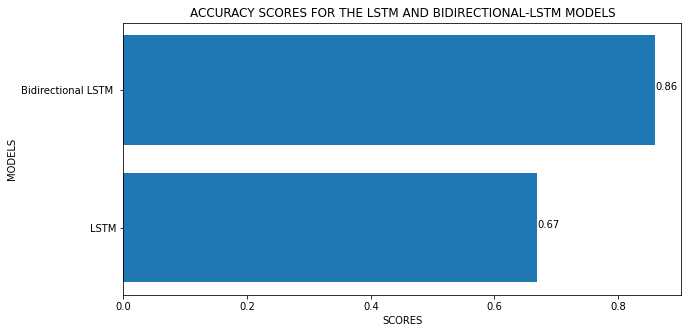

In [ ]:
fig = plt.figure()
fig = plt.figure(figsize = (10, 5))
label = ['LSTM', 'Bidirectional LSTM ']
scores = [LSTM_results[0], results_bi_LSTM[0]]
plt.ylabel("MODELS")
plt.xlabel("SCORES")
plt.barh(label,scores)
plt.title("ACCURACY SCORES FOR THE LSTM AND BIDIRECTIONAL-LSTM MODELS")
for index, value in enumerate(scores):
    plt.text(value, index, str(round(value, 2)))
plt.show()